# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Riccardo Beccaria - Luglio 2021</span>

# <span style="color:green"> Esercitazione 9<span>

### Esercizio 09.1
Write a C++ code to solve the TSP with a Genetic algorithm (GA). Note that you should invent some genetic-mutation operators and a genetic-crossover operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.
Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm
- a picture of the best path

In questa esercitazione ho scritto un <font color="red">algoritmo genetico GA</font> per la risoluzione del problema del commesso viaggiatore. Il problema del commesso viaggiatore consiste nel ricercare il percorso di minor lunghezza che consenta al viaggiatore di passare da un certo numero di città senza visitarne alcuna due volte. Nel corso di questa esercitazione ho risolto il problema del commesso viaggiatore con 32 città, posizionandole randomicamente su una circonferenza e all'interno di un quadrato. L'algoritmo genetico è di fatto un algoritmo per minimizzare una certa funzione di costo. Nel mio caso ho selezionato la funzione costo come la lunghezza totale dell'intinerario del commesso viaggiatore lungo tutte le 32 città: $$L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|$$

#### Inizializzazione dell'algoritmo e spiegazione delle classi

L'intero algoritmo è costruito su due principali classi. La prima classe l'ho chiamata `Figlio`. Questa classe contiene due data membri. Il primo data membro contiene un vettore di 32 interi, ovvero il cromosoma. Questo data membro rappresenta l'itinerario del commesso viaggiatore: all'interno del vettore vengono disposte le città nell'ordine in cui vengono visitate. Poiché le soluzioni a questo problema presentano una degenerazione di grado N (dovuta alla scelta delle N possibili hometown), si è deciso di mantenere sempre la stessa città di partenza in tutti i possibili itinerari: la città 1.  Il secondo data membro di nome <font face="Courier">m_len</font> della classe `Figlio`, è invece un intero che fornisce la lunghezza di quell'itinerario contenuto nel primo data membro.


La seconda classe l'ho chiamata `Generazione`. Questa classe presenta diversi data membri, tra cui il più importante è un vettore di `Figlio` di lunghezza <font face="Courier">number_of_sons</font>. Questa variabile <font face="Courier">number_of_sons</font> viene fornita al codice tramite un file di input di nome <font face="Courier">input.dat</font>. Per l'esecuzione del codice ho utilizzato <font face="Courier">number_of_sons</font>=600, pertanto la classe `Generazione` da me definita contiene un vettore di 600 `Figlio`. Gli altri data membri della classe `Generazione` sono quattro *double* che serviranno per indicare la probabilità di mutazione di un cromosoma come verrà spiegato in seguito in questo report.

<font color="red">N.B.</font> Al termine dell'itinerario, in cui sono state visitate tutte le città una sola volta, il commesso viaggiatore deve ritornare alla prima città ovvero la città da cui è partito. Per questa ragione ho implementato una funzione *PBC( )* con l'obbiettivo proprio di garantire che nel calcolo della lunghezza dell'itinerario fosse contato anche il percorso che separa l'ultima città del cromosoma con la città da cui il commesso viaggiatore è partito.

Un'ulteriore classe che ho implementato per comodità è la classe `Cities`. Questa classe in realtà contiente soltanto un vettore di 32 coppie di coordinate per rappresentare le ascisse e le coordinate delle 32 città. Evidentemente questa classe è superflua e avrei potuto semplicemente utilizzare un vettore nel main. Tuttavia ho deciso di implementarla comunque per comodità, e per bellezza estetica del codice. Per tutti questi vettori definiti sono stati utilizzati i vettori della libreria `<vector>` già implementata.

Quando viene lanciato l'algoritmo dopo l'inizializzazione del generatore di numeri casuali, si richiama al costruttore della classe `Cities` a cui vengono dati in ingresso due variabili: la variabile <font face="Courier">square_circle</font>, e la variabile <font face="Courier">n_cities</font>. Questo costruttore genera un numero <font face="Courier">n_cities</font> (nel mio caso 32) di città su una circonferenza se <font face="Courier">square_circle</font> è uguale a $0$, mentre se è uguale a $1$ le genera all'interno di un quadrato. Una volta costruite le città, viene costruita la `Generazione`. Per costruirla si richiama il suo costruttore che riceve in ingresso <font face="Courier">number_of_sons</font> già presentato prima. Il costruttore genera all'interno della generazione 600 figli con itinerari casuali tra di loro tutti diversi. Per randomizzare gli itinerari si utlizza la funzione *random_shuffle* presente nella libreria `<vector>`.


Una volta definita la generazione, viene richiamata una sua funzione di nome **Measure( )**. Questa funzione misura le lunghezze degli itinerari di ciascuno dei 600 Figli, opportunamente salvandole all'interno del data membro <font face="Courier">m_len</font> di ciascun figlio. Una volta misurata la lunghezza di ciascun itinerario viene richiamata un'ulteriore funzione di generazione di nome **Sorting( )**. Sorting( ) riordina i 600 cromosomi a seconda della lunghezza del loro itinerario: da quello con lunghezza minore a quello con lunghezza maggiore. Alla base del funzionamento di questa funzione c'è la funzione *sort* della libreria `<algorithm>`: a *sort*, oltre al punto di inizio e di fine del vettore da riordinare, viene passato un terzo parametro che è una booleana per comparare le lunghezze di due itinerari. A questo punto si è conclusa la parte di inizializzazione dell'algoritmo ed è possibile procedere al cuore dell'algoritmo genetico.

#### L'algoritmo genetico

Al centro dell'algoritmo genetico ci sono due funzioni che ho iplementato all'interno della classe `Generazione`.

La prima funzione è la funzione **Mutation( )**. Questa funzione permette infatti a ciascun figlio della generazione di mutare il suo cromosoma, ovvero di mutare l'ordine delle città del suo itinerario. Le mutazioni sono essenziali nell'algoritmo genetico per uscire da minimi locali e piu in generale per esplorare nuovi possibili itinerari con la possibilità che questi presentino una lunghezza minore di quelli precedentemente osservati. Le mutazioni che ho implementato sono di quattro tipi:

1. La mutazione *Swap* in cui vengono scelte due posizioni casuali all'interno del cromosoma e vengono invertite le città a quelle due posizioni.
2. La mutazione *Shift* in cui vengono appunto shiftate $m$ città contigue di $n$ posizioni: in questo caso $n$ ed $m$ sono variabili estratte random.
3. La mutazione *Permutation* che permuta $m$ città contigue con altre $m$ città contigue: anche in questo caso $m$ è estratto randomicamente
4. La mutazione *Inversion* che semplicemente inverte l'itinerario di m città.

Ciascuna di queste mutazione ha una sua probabilità di successo che viene fornita al codice tramite il file <font face="Courier">input.dat</font> all'inizio del codice, e che viene salvata all'interno di un data membro nella classe `Generazione`. Nell'eseguire il mio algoritmo genetico ho potuto osservare che mettendo tutte e quattro le probabilità pari a $0.08$ si ha una buona convergenza dell'algoritmo. Così ciascuna mutazione ha un buon 8% di probabilità di successo. In ogni caso, è come sempre possibile cambiare il valore di queste probabilità dall'interno del file <font face="Courier">input.dat</font>.
Quando questa funzione Mutation( ) viene richiamata, esegue queste mutazioni appena descritte per tutti i figli all'interno della generazione.

La seconda funzione che è il vero motore dell'algoritmo genetico, è la funzione **Crossover( )**. Questa funzione seleziona due genitori tra tutti i Figli all'interno della Generazione. Scelti questi due genitori, la funzione genera due nuovi figli intersecando con una certa probabilità i loro genomi: questo fenomeno viene detto *crossover* e avviene con una certa probabilità data da <font face="Courier">prob_cross</font>. Il crossover consiste innanzitutto nel selezionare un numero randomico $r \in [1,32]$ uniformemente che rappresenta la posizione di talgio. Prima del taglio, ogni figlio copia tutti i geni da uno dei due genitori, e dopo il taglio mette i geni che gli mancano (ovvero le città che ancora non sono state copiate) nell'ordine in cui appaiono nell'altro genitore. Questo processo viene ripetuto fino alla completa generazione di una nuova `Generazione`. Per simulare un processo evolutivo in cui riescono a rimanere in vita i figli che hanno più affinità alla sopravvivenza, i genitori da cui vengono generati due figli vengono selezionati con un dado truccato. Infatti, i due genitori non si scelgono estraendo randomicamente un numero casuale tra 1 e 600 (numero totale dei cromosomi in una generazione), ma piuttosto vengono scelti estraendo: $j=int(N \cdot r^p)$ dove $j$ è l'indice del genitore selezionato, $N$ il numero totale di cromosomi all'intero di una generazione, $r$ è un numero random estratto uniformemente tra 0 e 1, e $p$ un certo coefficiente maggiore di 1. Anche in questo caso il valore di $p$ può essere fornito dall'esterno nel file di input <font face="Courier">input.dat</font>: nel mio caso ho assegnato $p=2$. In questo modo, dal momento che $p$ è maggiore di 1, j è un numero causale che ha più probabilità di essere un numero prossimo allo 0 che un numero prossimo a $N$. Pertanto, dal momento che prima di richiamara la funzione Crossover( ) si sono ordinati i figli della generazione in ordine crescente con le lunghezze dell'itinerario, si ha più probabilità di estrarre un Figlio che contiene un itinerario di minor lunghezza che un figlio che contiene un itinerario di maggior lunghezza. Questo processo quindi, mi permette di avere un algoritmo che favorisce la sopravvivenza nel corso delle generazioni e la proliferazione di cromosomi che minimizzano la funzione costo selezionata. Ad ogni generazione il crossover viene eseguito con una probabilità dell'80%, altrimenti si copiano semplicemente i due parenti selezionati.

#### Esecuzione del GA

Una volta che mi sono accertato del corretto funzionamento di tutte queste funzioni, ho eseguito il codice producendo un numero <font face="Courier">n_generazioni</font> di generazioni. Anche questo numero <font face="Courier">n_generazioni</font> viene passato al codice tramite il solito file di input <font face="Courier">input.dat</font>. Per ogni generazione si effettua *mutazioni* e *crossover*. Ho potuto verificare che porre <font face="Courier">n_generazioni</font>= 600 garantisce la convergenza dell'algoritmo.


Ho rappresentato nei grafici sottostanti:
1. L'itineratio *Best* con minore lunghezza alla prima generazione.
2. L'itinerario *Best* con minore lunghezza all'ultima generazione simulata.
3. L'andamento di $L^{(1)}$ best e di $\langle L^{(1)}\rangle$ in funzione del numero di generazioni eseguite.

Ho riportato tutte queste quantità sia per città generate su una circonferenza, che per città generate all'interno di un quadrato.

### CITIES INTO A SQUARE

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
%config InlineBackend.figure_format = 'retina'

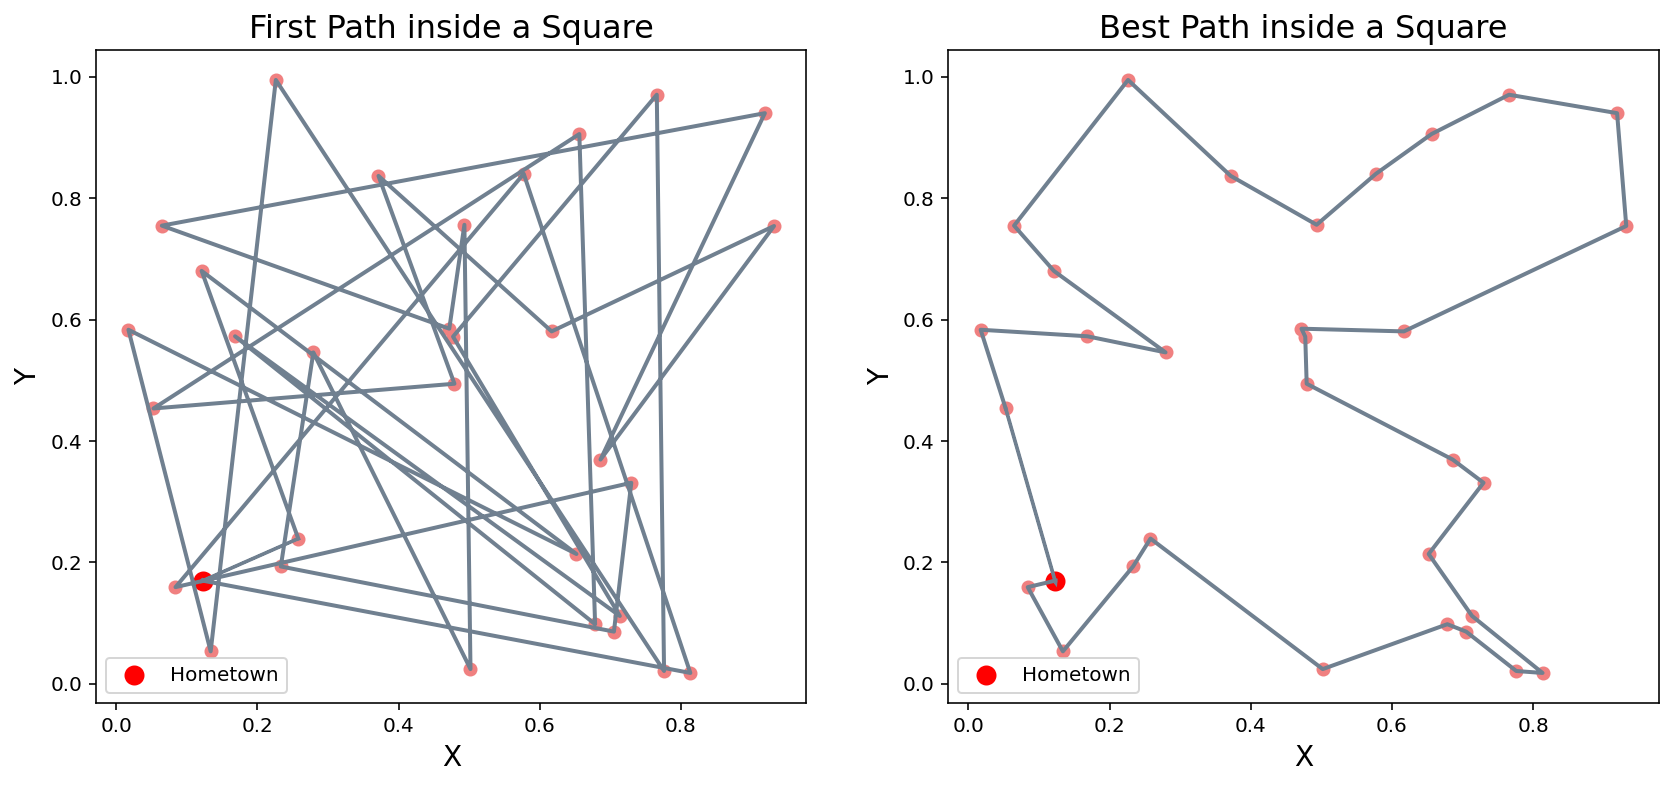

In [10]:
fig, axs= plt.subplots(1,2, figsize=(14,6))

x1,y1 = np.loadtxt("./09.1/First_trip_square.txt", usecols=(1,2),unpack=True)
x2,y2 = np.loadtxt("./09.1/Final_trip_square.txt", usecols=(1,2),unpack=True)

axs[0].set_title("First Path inside a Square", fontsize=16)
axs[0].plot(x1,y1, color='slategrey', linewidth=2)
axs[0].scatter(x1, y1, color='lightcoral')    
axs[0].scatter(x1[0], y1[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[0].arrow(x1[31], y1[31], x1[0]-x1[31], y1[0]-y1[31], color='slategrey', linewidth=1.5)



axs[1].set_title("Best Path inside a Square", fontsize=16)
axs[1].plot(x2,y2, color='slategrey', linewidth=2)
axs[1].scatter(x2, y2, color='lightcoral')    
axs[1].scatter(x2[0], y2[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[1].arrow(x2[31], y2[31], x2[0]-x2[31], y2[0]-y2[31], color='slategrey', linewidth=1.5)

for gino in axs.flat:
    gino.set_xlabel("X", fontsize=14)
    gino.set_ylabel("Y", fontsize=14)
    gino.legend(fontsize="medium")

plt.show()

######### Square #########
#    Best: 4.68713     #
#    Medium: 4.84373     #
##########################


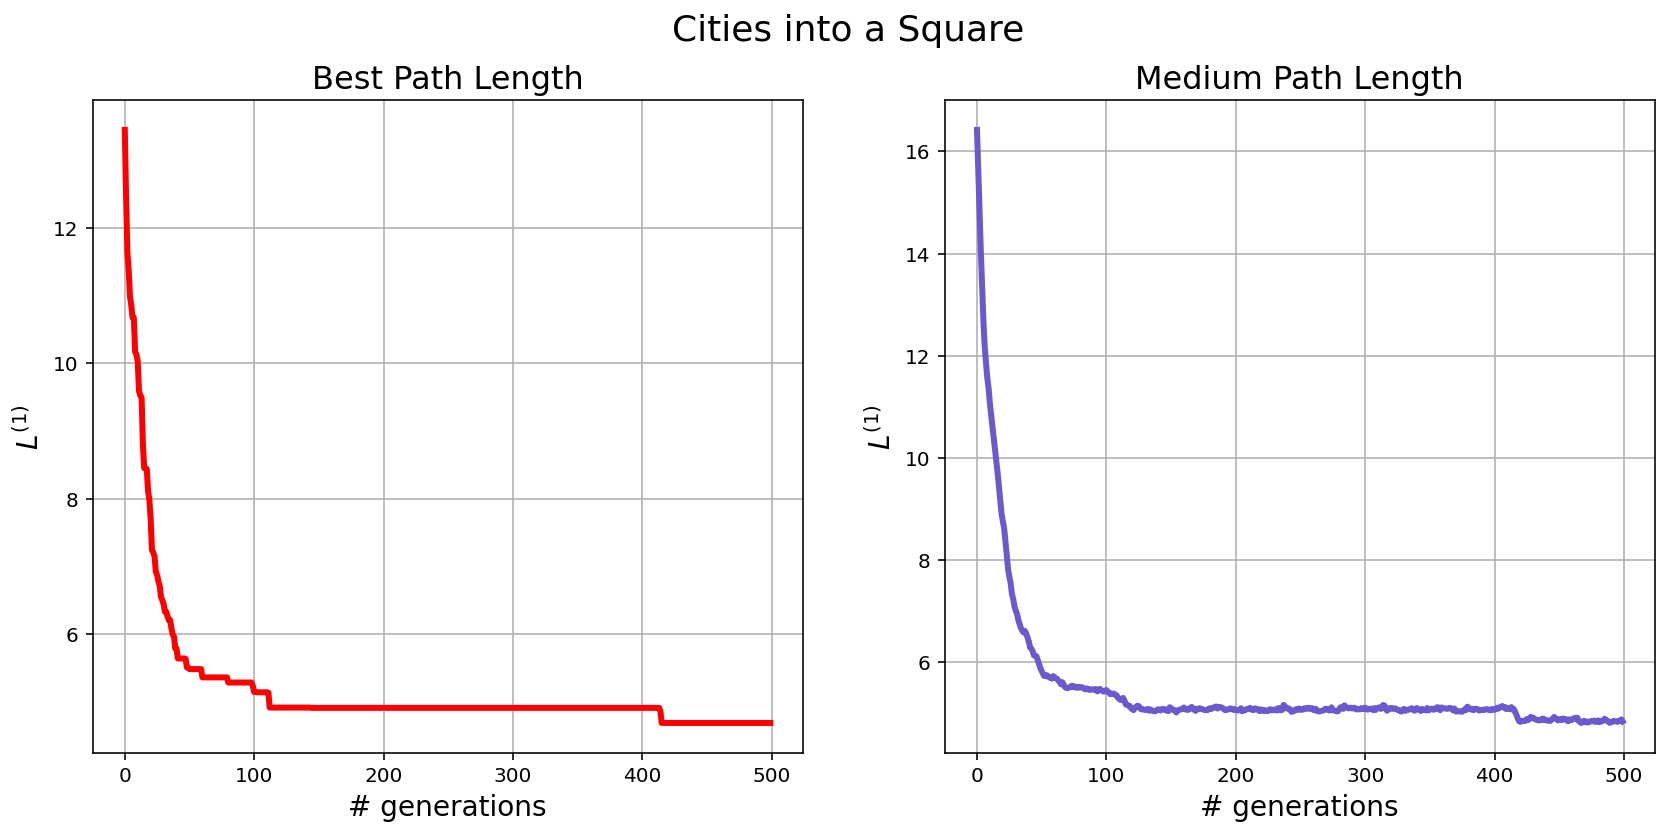

In [11]:
fig, axs= plt.subplots(1,2, figsize=(14,6))

plt.suptitle("Cities into a Square", fontsize=18)

gen, best = np.loadtxt("09.1/Best_len_square.txt", usecols=(0,1), unpack=True)
gen, medium = np.loadtxt("09.1/Medium_len_square.txt", usecols=(0,1), unpack=True)

axs[0].set_title("Best Path Length", fontsize=16)
axs[0].plot(gen, best, color='red', linewidth=3)


axs[1].set_title("Medium Path Length", fontsize=16)
axs[1].plot(gen, medium, color='slateblue', linewidth=3)


for gino in axs.flat:
    gino.set_xlabel("# generations", fontsize=14)
    gino.set_ylabel("$L^{(1)}$", fontsize=14)
    gino.grid()
    
print("######### Square #########")
print("#    Best:", best[-1], "    #")
print("#    Medium:", medium[-1], "    #")
print("##########################")


plt.show()

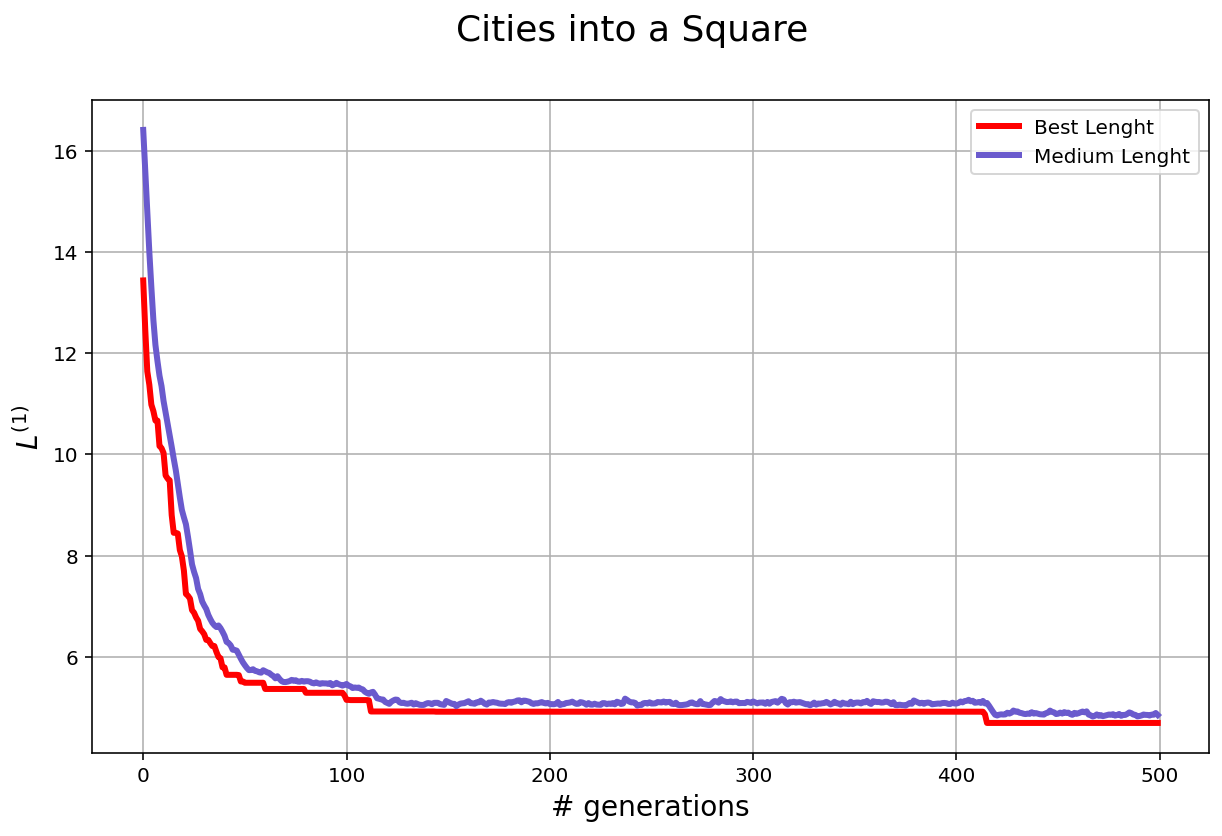

In [12]:
plt.figure(figsize=(10,6))

plt.suptitle("Cities into a Square", fontsize=18)
plt.plot(gen, best, color='red', linewidth=3, label="Best Lenght")
plt.plot(gen, medium, color='slateblue', linewidth=3, label="Medium Lenght")
plt.xlabel("# generations", fontsize=14)
plt.ylabel("$L^{(1)}$", fontsize=14)

plt.legend()
plt.grid()
plt.show()

Nel grafico soprastante ho riportato anche il confronto della lunghezza media e della lunghezza best in funzione delle generazioni nello stesso plot. L'andamento ottenuto mi piace per due motivi:
- Innanzitutto la grande somiglianza tra $L^{(1)}$ best e $\langle L^{(1)}\rangle$ mi conferma il corretto funzionamento della funzione Crossover( ): a cavallo delle generazioni vengono selezionati i figli con itinerari di lunghezza minore.
- Invece il fatto che $\langle L^{(1)}\rangle$ sia appena sopra $L^{(1)}$ best e non sovrapposta, mi conferma il corretto funzionamento delle mutazioni. Inoltre, il fatto che le due curve non siano sovrapposte è di grande importanza per l'algoritmo genetico. Infatti, aver ottenuto che anche a convergenza i cromosomi della generazione non siano tutti uguali al cromosoma contenente l'itinerario migliore, mi consente di uscire da un eventuale minimo locale raggiunto nel corso della simulazione. Se infatti tutti i cromosomi fossero uguali tra loro, ma l'itinerario rappresentato è un certo percorso che in realtà è un minimo locale, ci sarebbe una bassissima probabilità di uscirci. Invece col il fatto che anche a convergenza i cromosomi sono diversi tra loro, mi fa sperare che anche incontrando un minimo locale, l'algoritmo riesca ad uscirne.

### CITIES ON A CIRCLE

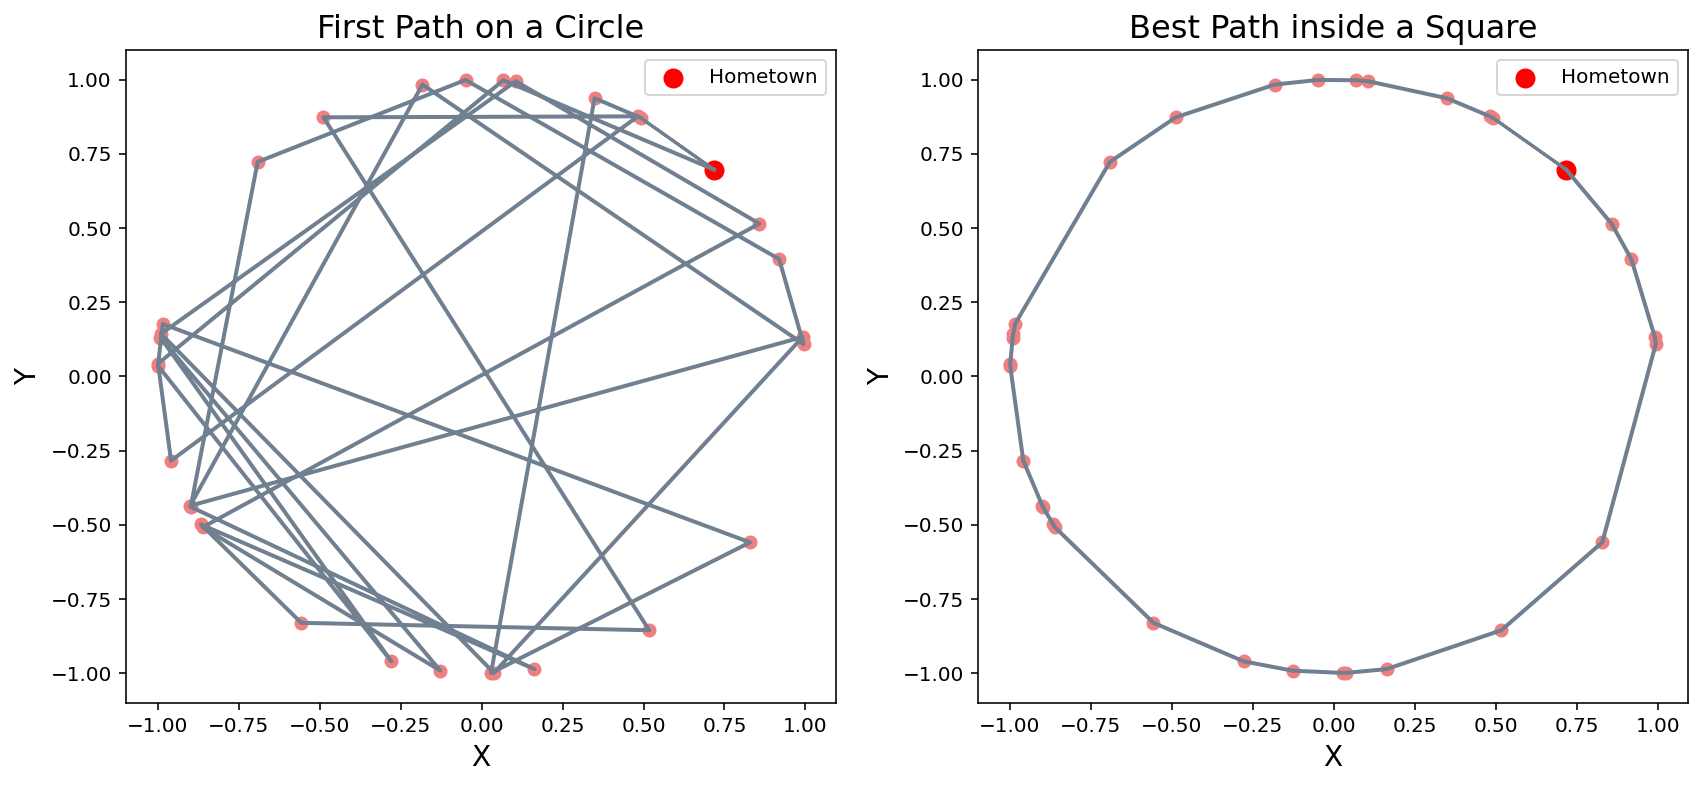

In [13]:
fig, axs= plt.subplots(1,2, figsize=(14,6))

x1,y1 = np.loadtxt("./09.1/First_trip_circle.txt", usecols=(1,2),unpack=True)
x2,y2 = np.loadtxt("./09.1/Final_trip_circle.txt", usecols=(1,2),unpack=True)

axs[0].set_title("First Path on a Circle", fontsize=16)
axs[0].plot(x1,y1, color='slategrey', linewidth=2)
axs[0].scatter(x1, y1, color='lightcoral')    
axs[0].scatter(x1[0], y1[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[0].arrow(x1[31], y1[31], x1[0]-x1[31], y1[0]-y1[31], color='slategrey', linewidth=1.5)



axs[1].set_title("Best Path inside a Square", fontsize=16)
axs[1].plot(x2,y2, color='slategrey', linewidth=2)
axs[1].scatter(x2, y2, color='lightcoral')    
axs[1].scatter(x2[0], y2[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[1].arrow(x2[31], y2[31], x2[0]-x2[31], y2[0]-y2[31], color='slategrey', linewidth=1.5)

for gino in axs.flat:
    gino.set_xlabel("X", fontsize=14)
    gino.set_ylabel("Y", fontsize=14)
    gino.legend(fontsize="medium")

plt.show()

######### Square #########
#    Best: 6.2403     #
#    Medium: 6.48414     #
##########################


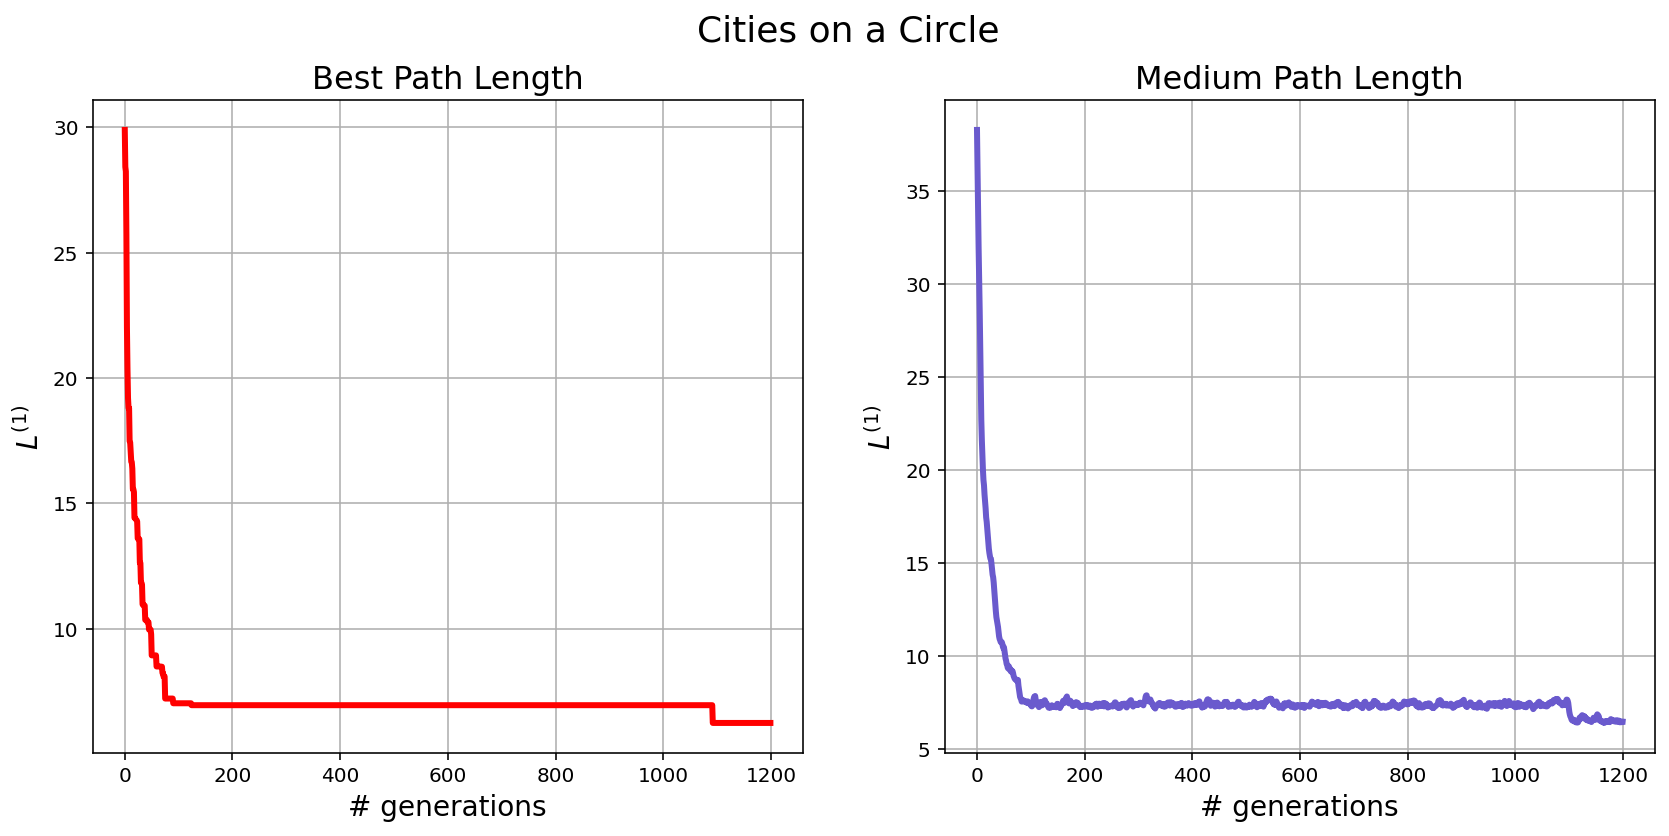

In [14]:
fig, axs= plt.subplots(1,2, figsize=(14,6))

plt.suptitle("Cities on a Circle", fontsize=18)

gen, best = np.loadtxt("09.1/Best_len_circle.txt", usecols=(0,1), unpack=True)
gen, medium = np.loadtxt("09.1/Medium_len_circle.txt", usecols=(0,1), unpack=True)

axs[0].set_title("Best Path Length", fontsize=16)
axs[0].plot(gen, best, color='red', linewidth=3)


axs[1].set_title("Medium Path Length", fontsize=16)
axs[1].plot(gen, medium, color='slateblue', linewidth=3)


for gino in axs.flat:
    gino.set_xlabel("# generations", fontsize=14)
    gino.set_ylabel("$L^{(1)}$", fontsize=14)
    gino.grid()
    
print("######### Square #########")
print("#    Best:", best[-1], "    #")
print("#    Medium:", medium[-1], "    #")
print("##########################")


plt.show()

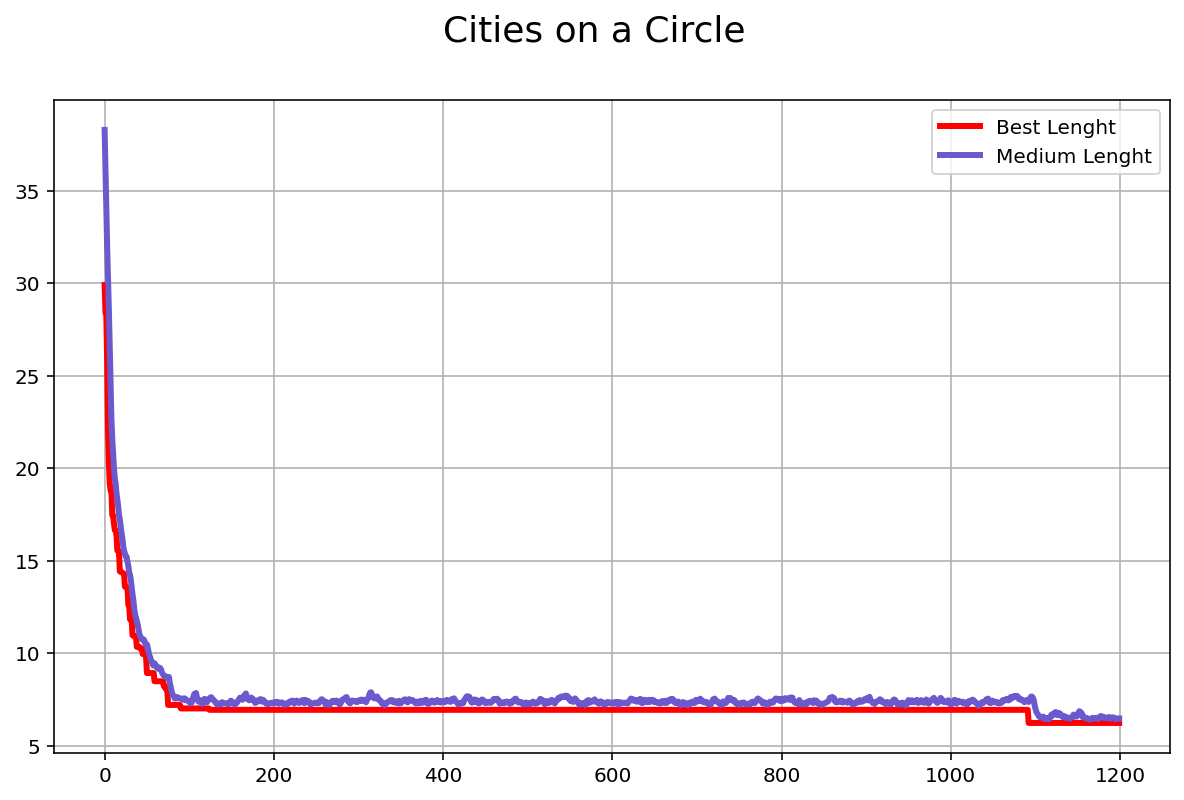

In [15]:
plt.figure(figsize=(10,6))

plt.suptitle("Cities on a Circle", fontsize=18)
plt.plot(gen, best, color='red', linewidth=3, label="Best Lenght")
plt.plot(gen, medium, color='slateblue', linewidth=3, label="Medium Lenght")

plt.legend()
plt.grid()
plt.show()